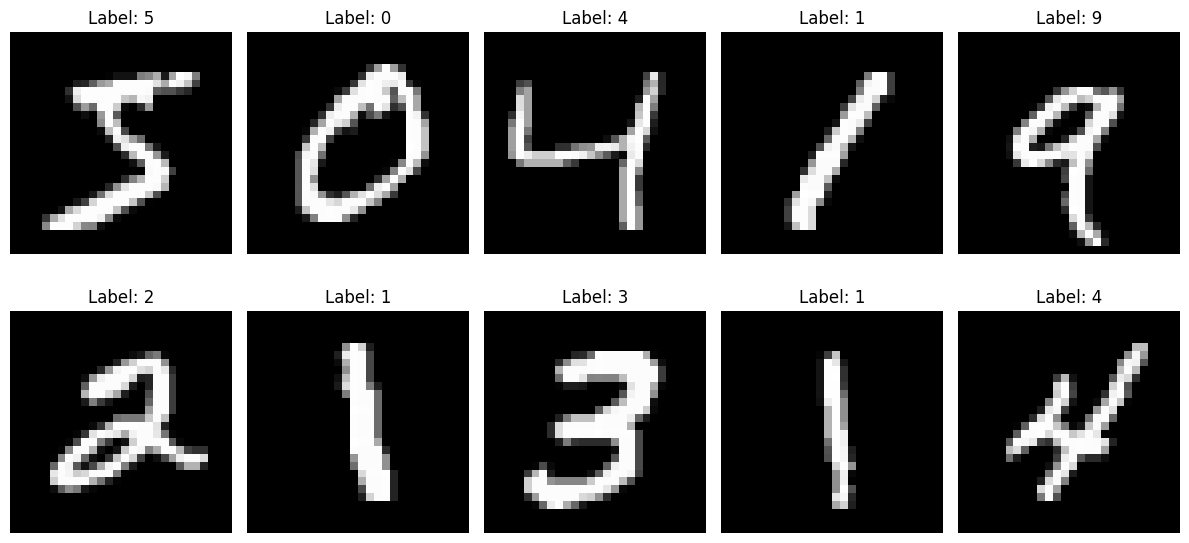

In [6]:

import numpy as np
import matplotlib.pyplot as plt
import torchvision as tv

# Aufgabe 1: Laden des MNIST-Datensatzes
MNIST_dataset_train = tv.datasets.MNIST(root='./data', train=True, download=True)
MNIST_dataset_test = tv.datasets.MNIST(root='./data', train=False, download=True)

# Konvertieren des MNIST-Datensatzes in NumPy-Arrays
train_images = np.array([np.array(img) for img, _ in MNIST_dataset_train])
train_labels = np.array([label for _, label in MNIST_dataset_train])

test_images = np.array([np.array(img) for img, _ in MNIST_dataset_test])
test_labels = np.array([label for _, label in MNIST_dataset_test])

# Anzeigen der ersten 10 Bilder mit Matplotlib
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Aufgabe 2

In [2]:

class LinearLayer:
    """
    A simple Linear Layer.

    Parameters:
    -----------
    input_size: int
        The number of input features
    hidden_size: int
        The number of neurons in the hidden layer
    """
    def __init__(self, input_size, hidden_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        # Initialize weights and biases
        self.weights1 = np.random.randn(self.input_size, self.hidden_size)
        self.bias1 = np.zeros((1, self.hidden_size))

    def forward(self, X):
        """
        Perform forward propagation.
        
        Parameters:
        -----------
        X: numpy array
            The input data
        
        Returns:
        --------
        numpy array
            The predicted output
        """
        # Store input for backward pass
        self.X = X

        # Perform forward propagation
        self.z1 = np.dot(X, self.weights1) + self.bias1
        return self.z1

    def backward(self, dz):
        """
        Perform backpropagation for a single linear layer.
        
        Args:
          dz: numpy array
          Gradient of the cost with respect to the linear output of the layer.
          Returns:
          dx: numpy array
          Gradient of the cost with respect to the input of the layer.
          dw: numpy array
          Gradient of the cost with respect to the weights.
          db: numpy array
          Gradient of the cost with respect to the bias.
          """
        n = dz.shape[0]  # Number of samples in the batch
        
        # Gradient of the loss with respect to the weights
        self.dw1 = np.dot(self.X.T, dz) / n
        
        # Gradient of the loss with respect to the bias
        self.db1 = np.sum(dz, axis=0, keepdims=True) / n
        
        # Gradient of the loss with respect to the input of the layer
        self.dx1 = np.dot(dz, self.weights1.T)
        
        return self.dx1, self.dw1, self.db1

    def update(self, learning_rate):
        """
        Update weights and biases based on calculated gradients.
        
        Parameters:
        -----------
        learning_rate: float
        The learning rate for updating the weights and biases.
        """
        # Update weights
        self.weights1 -= learning_rate * self.dw1
        # Update biases
        self.bias1 -= learning_rate * self.db1
class Sigmoid:
    def forward(self, z):
        return 1 / (1 + np.exp(-z))

    def backward(self, z, dz):
        sig = self.forward(z)
        return dz * sig * (1 - sig)

# Testen der LinearLayer Klasse
class TestLinearLayer(unittest.TestCase):
    def setUp(self):
        # For reproducible results
        np.random.seed(42)
        # LinearLayer with predefined input and hidden size
        self.network = LinearLayer(input_size=2, hidden_size=1)
        # Set the weights and bias to known values
        self.network.weights1 = np.array([[0.1], [0.2]])
        self.network.bias1 = np.array([[0.3]])

    def test_forward(self):
        # Define a simple test case
        X = np.array([[0.5, -0.3]])
        # Perform forward propagation
        output = self.network.forward(X)
        # Check if output has the correct shape
        self.assertEqual(output.shape, (1, 1))

    def test_backward(self):
        # Input for backpropagation
        X = np.array([[0.5, -0.3]])
        # Perform forward propagation
        self.network.forward(X)
        # Assume random gradients for testing
        dz = np.random.randn(1, 1)
        # Perform backward propagation
        self.dx1, self.dw1, self.db1 = self.network.backward(dz)
        # Check if gradients have the correct shape
        self.assertEqual(self.dx1.shape, X.shape)
        self.assertEqual(self.dw1.shape, self.network.weights1.shape)
        self.assertEqual(self.db1.shape, self.network.bias1.shape)

    def test_update(self):
        # Input and target output for backpropagation
        X = np.array([[0.5, -0.3]])
        y = np.array([[1]])
        # Store the original weights
        original_weights = self.network.weights1.copy()
        original_bias = self.network.bias1.copy()
        # Perform forward and backward propagation
        self.network.forward(X)
        dz = np.random.randn(1, 1)  # Random gradients for testing
        self.dx1, self.dw1, self.db1 = self.network.backward(dz)
        # Update weights and biases
        learning_rate = 0.01
        self.network.update(learning_rate)
        # Check if weights and biases have been updated
        self.assertFalse(np.array_equal(self.network.weights1, original_weights))
        self.assertFalse(np.array_equal(self.network.bias1, original_bias))

# Execute the tests
unittest.main(argv=[''], exit=False)

...
----------------------------------------------------------------------
Ran 3 tests in 0.002s

OK


Aufgabe 3

C:\Users\rapha\AppData\Local\Temp\ipykernel_10700\5616843.py:85: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Accuracy on test data: 0.9212062256809338


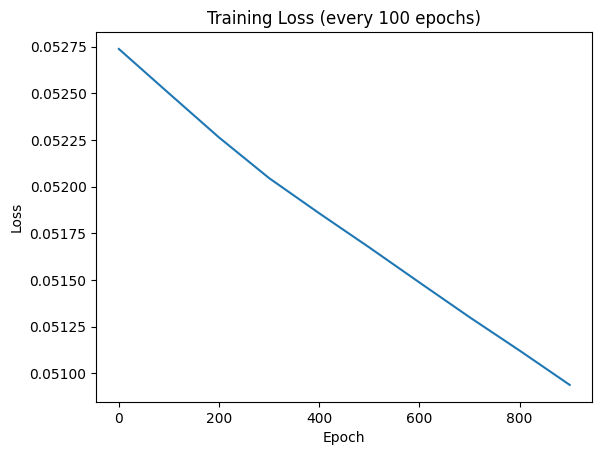

['trained_model_Aufgabe3.pkl']

In [384]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision as tv
import joblib

class LinearLayer:
    """
    A simple Linear Layer.
    Parameters:
    -----------
    input_size: int
        The number of input features
    hidden_size: int
        The number of neurons in the hidden layer
    """
    def __init__(self, input_size, hidden_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        # Initialize weights and biases
        self.weights1 = np.random.randn(self.input_size, self.hidden_size)
        self.bias1 = np.zeros((1, self.hidden_size))

    def forward(self, X):
        """
        Perform forward propagation.
        Parameters:
        -----------
        X: numpy array
            The input data
        Returns:
        --------
        numpy array
            The predicted output
        """
        # Store input for backward pass
        self.X = X

        # Perform forward propagation
        self.z1 = np.dot(X, self.weights1) + self.bias1
        return self.z1

    def backward(self, dz):
        """
        Perform backpropagation for a single linear layer.
        Args:
          dz: numpy array
          Gradient of the cost with respect to the linear output of the layer.
        Returns:
          dx: numpy array
          Gradient of the cost with respect to the input of the layer.
          dw: numpy array
          Gradient of the cost with respect to the weights.
          db: numpy array
          Gradient of the cost with respect to the bias.
        """
        n = dz.shape[0]  # Number of samples in the batch
        
        # Gradient of the loss with respect to the weights
        self.dw1 = np.dot(self.X.T, dz) / n
        
        # Gradient of the loss with respect to the bias
        self.db1 = np.sum(dz, axis=0, keepdims=True) / n
        
        # Gradient of the loss with respect to the input of the layer
        self.dx1 = np.dot(dz, self.weights1.T)
        
        return self.dx1, self.dw1, self.db1

    def update(self, learning_rate):
        """
        Update weights and biases based on calculated gradients.
        Parameters:
        -----------
        learning_rate: float
            The learning rate for updating the weights and biases.
        """
        # Update weights
        self.weights1 -= learning_rate * self.dw1
        # Update biases
        self.bias1 -= learning_rate * self.db1

class Sigmoid:
    def forward(self, z):
        return 1 / (1 + np.exp(-z))

    def backward(self, z, dz):
        sig = self.forward(z)
        return dz * sig * (1 - sig)

class NeuralNetwork_1:
    def __init__(self, input_size, hidden_size):
        """
        Initialize the neural network with specified sizes for input and hidden layers.
        Parameters:
        -----------
        input_size: int
            The number of input features
        hidden_size: int
            The number of neurons in the hidden layer
        """
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.loss_history = []
        # Initialize layers
        self.hidden_layer = LinearLayer(input_size, hidden_size)
        # Ausgabeschicht hat nur 1 Neuron
        self.output_layer = LinearLayer(hidden_size, 1)
        self.sigmoid = Sigmoid()

    def forward(self, X):
        """
        Perform forward propagation through the network.
        Parameters:
        -----------
        X: numpy array
            The input data
        Returns:
        --------
        numpy array
            The predicted output
        """
        # Forward pass through hidden layer
        self.hidden_output = self.sigmoid.forward(self.hidden_layer.forward(X))
        # Forward pass through output layer
        output = self.sigmoid.forward(self.output_layer.forward(self.hidden_output))
        return output

    def backward(self, X, y, learning_rate):
        """
        Perform backward propagation and update weights and biases.
        Parameters:
        -----------
        X: numpy array
            The input data
        y: numpy array
            The target output
        learning_rate: float
            The learning rate
        """
        # Compute loss derivative with respect to output
        loss_derivative = 2 * (self.output - y) / y.shape[0]  # Mean squared error loss derivative
        # Backpropagate through output layer
        dz_output = self.sigmoid.backward(self.output_layer.z1, loss_derivative)
        dx_output, dw_output, db_output = self.output_layer.backward(dz_output)
        # Backpropagate through hidden layer
        dz_hidden = self.sigmoid.backward(self.hidden_layer.z1, dx_output)
        dx_hidden, dw_hidden, db_hidden = self.hidden_layer.backward(dz_hidden)
        # Update weights and biases
        self.output_layer.update(learning_rate)
        self.hidden_layer.update(learning_rate)

    def train(self, X_train, y_train, epochs, learning_rate):
        """
        Train the neural network on the training data.
        Parameters:
        -----------
        X_train: numpy array
            The training input data
        y_train: numpy array
            The training target output
        epochs: int
            The number of training epochs
        learning_rate: float
            The learning rate
        """
        for epoch in range(epochs):
            # Forward pass
            self.output = self.forward(X_train)
            # Calculate loss (MSE)
            loss = np.mean((self.output - y_train) ** 2)
            # Save loss only every 100 epochs
            if epoch % 100 == 0:
                self.loss_history.append(loss)
            # Backward pass and update weights
            self.backward(X_train, y_train, learning_rate)

    def evaluate(self, X_test, y_test):
        """
        Evaluate the neural network on the test data.
        Parameters:
        -----------
        X_test: numpy array
            The test input data
        y_test: numpy array
            The test target output
        Returns:
        --------
        float
            The accuracy of the network on the test data
        """
        # Forward pass
        output = self.forward(X_test)
        # Convert output probabilities to binary predictions (0 or 1)
        predictions = np.where(output >= 0.5, 1, 0)
        # Calculate accuracy
        accuracy = np.mean(predictions == y_test)
        return accuracy

# Laden des MNIST-Datensatzes
MNIST_dataset_train = tv.datasets.MNIST(root='./data', train=True, download=True)
MNIST_dataset_test = tv.datasets.MNIST(root='./data', train=False, download=True)

# Konvertieren des MNIST-Datensatzes in NumPy-Arrays
train_images = np.array([np.array(img) for img, _ in MNIST_dataset_train])
train_labels = np.array([label for _, label in MNIST_dataset_train])

test_images = np.array([np.array(img) for img, _ in MNIST_dataset_test])
test_labels = np.array([label for _, label in MNIST_dataset_test])

# Preprocessing der Daten für die binäre Klassifikation (Identifizierung der Ziffer 7)
train_images_7 = train_images[train_labels == 7]
train_labels_7 = np.ones((train_images_7.shape[0], 1))
test_images_7 = test_images[test_labels == 7]
test_labels_7 = np.ones((test_images_7.shape[0], 1))

# Größe der MNIST-Bilder
input_size = 28 * 28
hidden_size = 16
learning_rate = 0.5
epochs = 1000

# Trainieren des neuronalen Netzwerks
model = NeuralNetwork_1(input_size, hidden_size)
model.train(train_images_7.reshape(-1, input_size), train_labels_7, epochs, learning_rate)

# Auswerten des neuronalen Netzwerks
accuracy = model.evaluate(test_images_7.reshape(-1, input_size), test_labels_7)
print("Accuracy on test data:", accuracy)

# Plot loss history
plt.plot(range(0, epochs, 100), model.loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss (every 100 epochs)')
plt.show()

# Speichern des trainierten Modells
joblib.dump(model, 'trained_model_Aufgabe3.pkl')


In [385]:
import numpy as np
import joblib

# Laden des gespeicherten Modells
model = joblib.load('trained_model_Aufgabe3.pkl')

# Funktion zur Vorhersage der Ziffer
def predict_digit(image):
    # Normalisierung des Bildes
    image_normalized = image / 255.0
    # Vorhersage mit dem Modell
    prediction = model.forward(image_normalized.reshape(1, -1))
    # Rückgabe der Vorhersage (1 für Ziffer 7, 0 für andere Ziffern)
    return 1 if prediction >= 0.5 else 0

# Aufteilen der Testdaten in 90% mit der Ziffer 7 und 10% mit anderen Ziffern
test_images_7 = test_images[test_labels == 7]
test_labels_7 = np.ones((test_images_7.shape[0], 1))
test_images_other = test_images[test_labels != 7][:len(test_images_7) // 5]
test_labels_other = np.zeros((test_images_other.shape[0], 1))

# Zusammenführen der Testdaten
test_images_combined = np.concatenate((test_images_7, test_images_other))
test_labels_combined = np.concatenate((test_labels_7, test_labels_other))

# Testen des Modells
predictions = [predict_digit(image) for image in test_images_combined]

# Auswertung der Vorhersagen
accuracy = np.mean(predictions == test_labels_combined)
print("Accuracy on test data:", accuracy)







Accuracy on test data: 0.8110023817839898


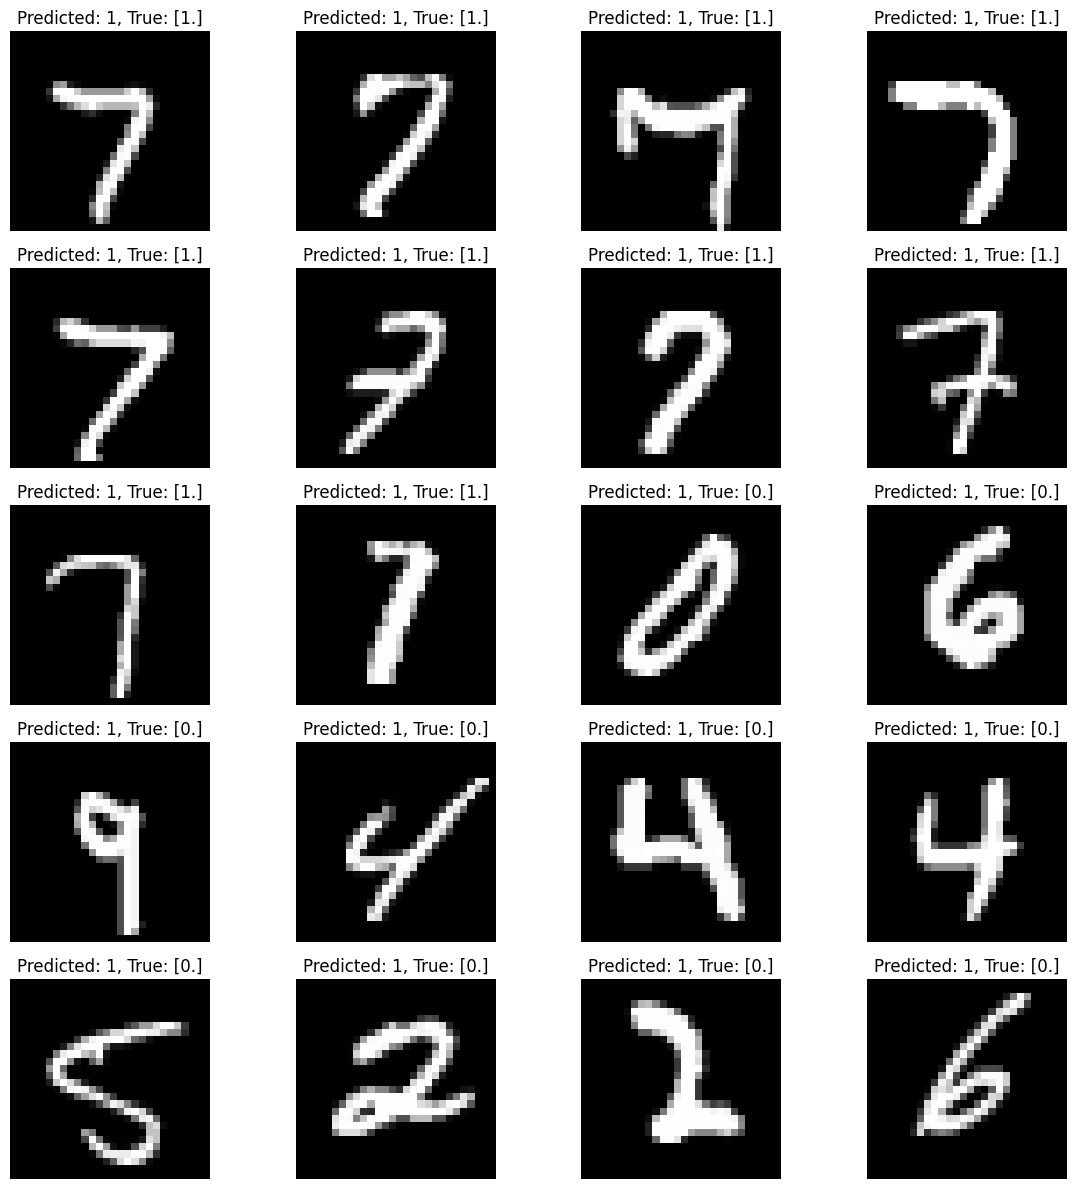

Aufgabe 4

C:\Users\rapha\AppData\Local\Temp\ipykernel_16896\1040664730.py:84: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Lernrate: 0.01
Größe des Hidden Layers: 4
Genauigkeit auf Testdaten: 0.41342412451361865
Genauigkeit auf Trainingsdaten: 0.4667198723064645

Lernrate: 0.01
Größe des Hidden Layers: 8
Genauigkeit auf Testdaten: 0.5749027237354085
Genauigkeit auf Trainingsdaten: 0.5594573024740622

Lernrate: 0.01
Größe des Hidden Layers: 16
Genauigkeit auf Testdaten: 0.7850194552529183
Genauigkeit auf Trainingsdaten: 0.7438148443735035

Lernrate: 0.1
Größe des Hidden Layers: 4
Genauigkeit auf Testdaten: 0.9630350194552529
Genauigkeit auf Trainingsdaten: 0.9675977653631285

Lernrate: 0.1
Größe des Hidden Layers: 8
Genauigkeit auf Testdaten: 0.5817120622568094
Genauigkeit auf Trainingsdaten: 0.5720670391061452

Lernrate: 0.1
Größe des Hidden Layers: 16
Genauigkeit auf Testdaten: 0.7626459143968871
Genauigkeit auf Trainingsdaten: 0.7567438148443735

Lernrate: 0.5
Größe des Hidden Layers: 4
Genauigkeit auf Testdaten: 0.9824902723735408
Genauigkeit auf Trainingsdaten: 0.9787709497206704

Lernrate: 0.5
Größe d

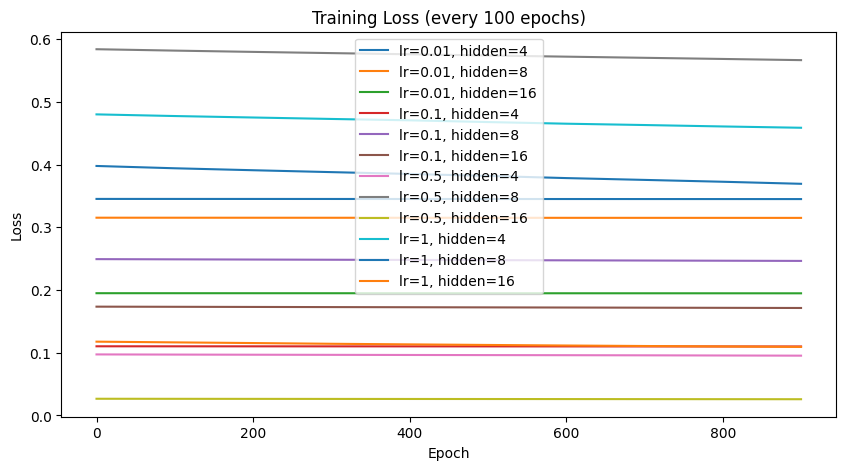

In [115]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.loss_history = []
        self.hidden_layer = LinearLayer(input_size, hidden_size)
        self.output_layer = LinearLayer(hidden_size, output_size)
        self.sigmoid = Sigmoid()

    def forward(self, X):
        self.hidden_output = self.sigmoid.forward(self.hidden_layer.forward(X))
        output = self.sigmoid.forward(self.output_layer.forward(self.hidden_output))
        return output

    def backward(self, X, y, learning_rate):
        loss_derivative = 2 * (self.output - y) / y.shape[0]
        dz_output = self.sigmoid.backward(self.output_layer.z1, loss_derivative)
        dx_output, dw_output, db_output = self.output_layer.backward(dz_output)
        dz_hidden = self.sigmoid.backward(self.hidden_layer.z1, dx_output)
        dx_hidden, dw_hidden, db_hidden = self.hidden_layer.backward(dz_hidden)
        self.output_layer.update(learning_rate)
        self.hidden_layer.update(learning_rate)

    def train(self, X_train, y_train, epochs, learning_rate):
        for epoch in range(epochs):
            self.output = self.forward(X_train)
            loss = np.mean((self.output - y_train) ** 2)
            if epoch % 100 == 0:
                self.loss_history.append(loss)
            self.backward(X_train, y_train, learning_rate)

    def evaluate(self, X_test, y_test):
        output = self.forward(X_test)
        predictions = np.where(output >= 0.5, 1, 0)
        accuracy = np.mean(predictions == y_test)
        return accuracy
# Aufgabe 1: Laden des MNIST-Datensatzes
MNIST_dataset_train = tv.datasets.MNIST(root='./data', train=True, download=True)
MNIST_dataset_test = tv.datasets.MNIST(root='./data', train=False, download=True)

# Konvertieren des MNIST-Datensatzes in NumPy-Arrays
train_images = np.array([np.array(img) for img, _ in MNIST_dataset_train])
train_labels = np.array([label for _, label in MNIST_dataset_train])

test_images = np.array([np.array(img) for img, _ in MNIST_dataset_test])
test_labels = np.array([label for _, label in MNIST_dataset_test])
# Daten vorbereiten
input_size = 28 * 28
output_size = 1
train_images_7 = train_images[train_labels == 7]
train_labels_7 = np.ones((train_images_7.shape[0], 1))
test_images_7 = test_images[test_labels == 7]
test_labels_7 = np.ones((test_images_7.shape[0], 1))

# Aufgabe 4: Trainieren mit verschiedenen Lernraten und Hidden Layer-Größen
learning_rates = [0.01, 0.1, 0.5, 1]
hidden_layer_sizes = [4, 8, 16]
epochs = 1000

results = []

for lr in learning_rates:
    for hidden_size in hidden_layer_sizes:
        # Trainieren des neuronalen Netzwerks
        model = NeuralNetwork(input_size, hidden_size, output_size)
        model.train(train_images_7.reshape(-1, input_size), train_labels_7, epochs, lr)

        # Bewertung auf Testdaten
        accuracy_test = model.evaluate(test_images_7.reshape(-1, input_size), test_labels_7)

        # Bewertung auf Trainingsdaten
        accuracy_train = model.evaluate(train_images_7.reshape(-1, input_size), train_labels_7)

        results.append({
            'Lernrate': lr,
            'Größe des Hidden Layers': hidden_size,
            'Genauigkeit auf Testdaten': accuracy_test,
            'Genauigkeit auf Trainingsdaten': accuracy_train,
            'Verlauf des Verlusts': model.loss_history
        })

# Ergebnisse ausgeben
for result in results:
    print("Lernrate:", result['Lernrate'])
    print("Größe des Hidden Layers:", result['Größe des Hidden Layers'])
    print("Genauigkeit auf Testdaten:", result['Genauigkeit auf Testdaten'])
    print("Genauigkeit auf Trainingsdaten:", result['Genauigkeit auf Trainingsdaten'])
    print()

# Plot loss history
plt.figure(figsize=(10, 5))
for result in results:
    plt.plot(range(0, epochs, 100), result['Verlauf des Verlusts'], label=f"lr={result['Lernrate']}, hidden={result['Größe des Hidden Layers']}")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss (every 100 epochs)')
plt.legend()
plt.show()

C:\Users\rapha\AppData\Local\Temp\ipykernel_10700\3380421801.py:101: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Learning Rate: 0.5
Hidden Layer Size: 16
Accuracy on Test Data: 0.8866
Accuracy on Train Data: 0.8971833333333333


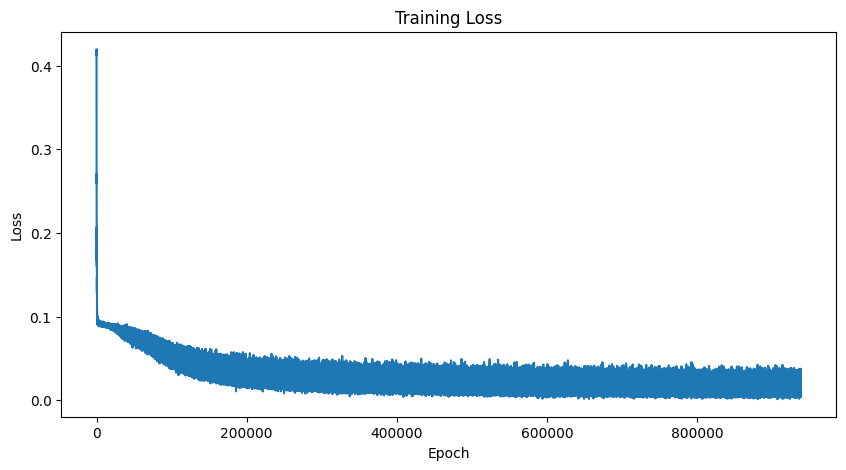

In [302]:

import numpy as np
import matplotlib.pyplot as plt
import torchvision as tv
import unittest

# Aufgabe 1: Laden des MNIST-Datensatzes
MNIST_dataset_train = tv.datasets.MNIST(root='./data', train=True, download=True)
MNIST_dataset_test = tv.datasets.MNIST(root='./data', train=False, download=True)

# Konvertieren des MNIST-Datensatzes in NumPy-Arrays
train_images = np.array([np.array(img) for img, _ in MNIST_dataset_train])
train_labels = np.array([label for _, label in MNIST_dataset_train])

test_images = np.array([np.array(img) for img, _ in MNIST_dataset_test])
test_labels = np.array([label for _, label in MNIST_dataset_test])

# Aufgabe 2: Implementierung der Klassen LinearLayer und Sigmoid (bereits vorhanden)
class LinearLayer:
    """
    A simple Linear Layer.

    Parameters:
    -----------
    input_size: int
        The number of input features
    hidden_size: int
        The number of neurons in the hidden layer
    """
    def __init__(self, input_size, hidden_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        # Initialize weights and biases
        self.weights1 = np.random.randn(self.input_size, self.hidden_size)
        self.bias1 = np.zeros((1, self.hidden_size))

    def forward(self, X):
        """
        Perform forward propagation.
        
        Parameters:
        -----------
        X: numpy array
            The input data
        
        Returns:
        --------
        numpy array
            The predicted output
        """
        # Store input for backward pass
        self.X = X

        # Perform forward propagation
        self.z1 = np.dot(X, self.weights1) + self.bias1
        return self.z1

    def backward(self, dz):
        """
        Perform backpropagation for a single linear layer.
        
        Args:
          dz: numpy array
          Gradient of the cost with respect to the linear output of the layer.
          Returns:
          dx: numpy array
          Gradient of the cost with respect to the input of the layer.
          dw: numpy array
          Gradient of the cost with respect to the weights.
          db: numpy array
          Gradient of the cost with respect to the bias.
          """
        n = dz.shape[0]  # Number of samples in the batch
        
        # Gradient of the loss with respect to the weights
        self.dw1 = np.dot(self.X.T, dz) / n
        
        # Gradient of the loss with respect to the bias
        self.db1 = np.sum(dz, axis=0, keepdims=True) / n
        
        # Gradient of the loss with respect to the input of the layer
        self.dx1 = np.dot(dz, self.weights1.T)
        
        return self.dx1, self.dw1, self.db1

    def update(self, learning_rate):
        """
        Update weights and biases based on calculated gradients.
        
        Parameters:
        -----------
        learning_rate: float
        The learning rate for updating the weights and biases.
        """
        # Update weights
        self.weights1 -= learning_rate * self.dw1
        # Update biases
        self.bias1 -= learning_rate * self.db1
class Sigmoid:
    def forward(self, z):
        return 1 / (1 + np.exp(-z))

    def backward(self, z, dz):
        sig = self.forward(z)
        return dz * sig * (1 - sig)
# Aufgabe 3: Erweiterung des NeuralNetworks
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.loss_history = []
        # Initialize layers
        self.hidden_layer1 = LinearLayer(input_size, hidden_size)
        self.hidden_layer2 = LinearLayer(hidden_size, hidden_size)
        self.hidden_layer3 = LinearLayer(hidden_size, hidden_size)
        self.output_layer = LinearLayer(hidden_size, output_size)
        self.sigmoid = Sigmoid()

    def forward(self, X):
        # Forward pass through hidden layers
        hidden_output1 = self.sigmoid.forward(self.hidden_layer1.forward(X))
        hidden_output2 = self.sigmoid.forward(self.hidden_layer2.forward(hidden_output1))
        hidden_output3 = self.sigmoid.forward(self.hidden_layer3.forward(hidden_output2))
        # Forward pass through output layer
        output = self.sigmoid.forward(self.output_layer.forward(hidden_output3))
        return output

    def backward(self, X, y, learning_rate):
        # Compute loss derivative with respect to output
        loss_derivative = 2 * (self.output - y) / y.shape[0]
        # Backpropagate through output layer
        dz_output = self.sigmoid.backward(self.output_layer.z1, loss_derivative)
        dx_output, dw_output, db_output = self.output_layer.backward(dz_output)
        # Backpropagate through hidden layers
        dz_hidden3 = self.sigmoid.backward(self.hidden_layer3.z1, dx_output)
        dx_hidden3, dw_hidden3, db_hidden3 = self.hidden_layer3.backward(dz_hidden3)
        dz_hidden2 = self.sigmoid.backward(self.hidden_layer2.z1, dx_hidden3)
        dx_hidden2, dw_hidden2, db_hidden2 = self.hidden_layer2.backward(dz_hidden2)
        dz_hidden1 = self.sigmoid.backward(self.hidden_layer1.z1, dx_hidden2)
        dx_hidden1, dw_hidden1, db_hidden1 = self.hidden_layer1.backward(dz_hidden1)
        # Update weights and biases
        self.output_layer.update(learning_rate)
        self.hidden_layer3.update(learning_rate)
        self.hidden_layer2.update(learning_rate)
        self.hidden_layer1.update(learning_rate)

    def train(self, X_train, y_train, epochs, learning_rate, batch_size):
        for epoch in range(epochs):
            # Shuffle training data for stochasticity
            indices = np.random.permutation(X_train.shape[0])
            X_train_shuffled = X_train[indices]
            y_train_shuffled = y_train[indices]
            # Split data into mini-batches
            for i in range(0, X_train.shape[0], batch_size):
                X_batch = X_train_shuffled[i:i+batch_size]
                y_batch = y_train_shuffled[i:i+batch_size]
                # Forward pass
                self.output = self.forward(X_batch)
                # Compute loss (MSE)
                loss = np.mean((self.output - y_batch) ** 2)
                self.loss_history.append(loss)
                # Backward pass and weight update
                self.backward(X_batch, y_batch, learning_rate)

    def evaluate(self, X_test, y_test):
        output = self.forward(X_test)
        predictions = np.argmax(output, axis=1)
        accuracy = np.mean(predictions == y_test)
        return accuracy

# Aufgabe 4: Trainieren mit einer Lernrate und einer Hidden Layer-Größe
input_size = 28 * 28
output_size = 10
hidden_size = 16
learning_rate = 0.5
epochs = 1000
batch_size = 64

# Preprocess the data for multi-class classification
train_labels_multi = np.eye(10)[train_labels]  # One-hot encoding
test_labels_multi = np.eye(10)[test_labels]

# Train the neural network
model = NeuralNetwork(input_size, hidden_size, output_size)
model.train(train_images.reshape(-1, input_size), train_labels_multi, epochs, learning_rate, batch_size)

# Evaluate the neural network
accuracy_test = model.evaluate(test_images.reshape(-1, input_size), test_labels)
accuracy_train = model.evaluate(train_images.reshape(-1, input_size), train_labels)

print("Learning Rate:", learning_rate)
print("Hidden Layer Size:", hidden_size)
print("Accuracy on Test Data:", accuracy_test)
print("Accuracy on Train Data:", accuracy_train)

# Plot loss history
plt.figure(figsize=(10, 5))
plt.plot(range(len(model.loss_history)), model.loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()



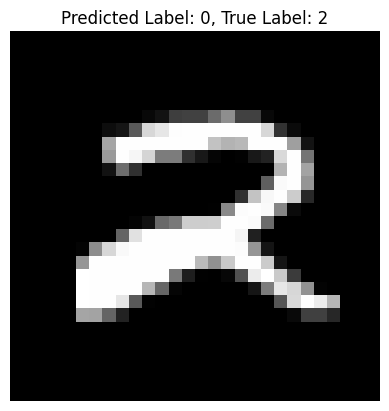

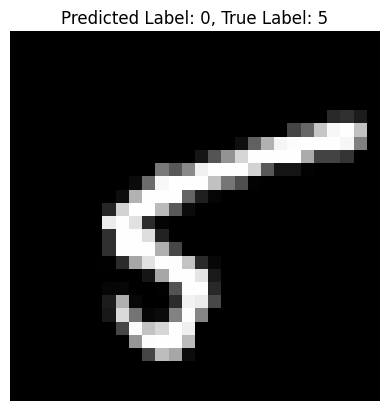